# Project: Diet and Disease

Welcome to our project, where we delve into a comprehensive exploration of global mortality factors. Our primary focus will be on understanding the leading causes of death worldwide. Specifically, we will delve into the intricate relationship between diet and one of these significant factors - heart disease. Join us on this enlightening journey as we investigate and unveil the potential connections between dietary habits and heart-related health issues.

This project was originally completed for STAT 335 (Principles of Data Science) and has been updated after the completion of the course.

In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

# Investigating the Link Between Diet and Cardiovascular Disease

Death and its various causes might be unsettling topics, but understanding them is crucial for taking preventive measures. As the wise Professor Albus Dumbledore once said, "After all, to the well-organized mind, death is but the next great adventure."

Welcome to this comprehensive analysis, where we embark on a journey to explore Cardiovascular Disease (CVD), one of the world's most formidable killers. Our investigation spans decades of medical research, shedding light on multiple causes and effects from two different studies.

## Project Roadmap:
#### Part 1: Understanding Causes of Death
We begin by examining the major causes of death worldwide over the past century (1900 to 2015). This understanding will provide essential insights to effectively address mortality concerns.

#### Part 2: The Framingham Heart Study
In this section, we delve into the valuable data from the Framingham Heart Study—an observational investigation into cardiovascular health. This data will help us gain deeper insights into the factors contributing to heart disease.

#### Part 3: The Minnesota Coronary Experiment
Here, we explore clinical trials conducted during the Minnesota Coronary Experiment and introduce our second dataset. This study will further aid us in understanding the possible connections between diet and cardiovascular disease.

#### Part 4: Hypothesis Testing
In this phase, we subject our observed data from the Minnesota Coronary Experiment to hypothesis testing, allowing us to draw meaningful conclusions about diet and its impact on CVD.

#### Part 5: Concluding the Experiment
In the final section, we conclude the experiment and reflect on the knowledge gained about the intricate relationship between diet and cardiovascular disease.

## Part 1: Understanding Causes of Death

To gain valuable insights into effective preventive measures, it is essential to understand the major causes of death. Let's begin by exploring the causes_of_death table, which provides a comprehensive overview of death rates for major causes over the last century (1900 until 2015). By analyzing this data, we can better comprehend the significant factors contributing to mortality trends. Please run the provided cell to access and view the table.

In [2]:
causes_of_death = Table.read_table('causes_of_death.csv')
causes_of_death.show(5)

Year,Cause,Age Adjusted Death Rate
2015,Heart Disease,168.5
2015,Cancer,158.5
2015,Stroke,37.6
2015,Accidents,43.2
2015,Influenza and Pneumonia,15.2


The data in the column **Age Adjusted Death Rate** represents the death rate for a particular **Year** and **Cause** of death. The **Age Adjusted** specification in this column indicates that these death rates have been adjusted to account for the different age distributions in the population under study compared to a "standard" population, which serves as a baseline for comparison.

By applying age adjustment, we can accurately compare death rates across different years without being affected by changes in the demographics of the population. This method allows us to isolate the effect of specific causes of death and identify trends over time, providing a more accurate understanding of the impact of different causes on mortality rates.

## Identifying Unique Causes of Death


n this section, we aim to determine all the different causes of death present in our dataset. To accomplish this, we will use the group function to group the data in the causes_of_death table based on the 'Cause' column, extracting the unique values. We will then store these unique causes in an array called all_unique_causes.

Let's proceed with the following code to obtain the array of unique causes of death:

In [3]:
all_unique_causes = causes_of_death.group('Cause').column(0)
all_unique_causes
sorted(all_unique_causes)

['Accidents', 'Cancer', 'Heart Disease', 'Influenza and Pneumonia', 'Stroke']

## Plotting Death Rates Over Time: Creating the `causes_for_plotting` Table

To visualize the death rates for each disease over time, we will create a table called `causes_for_plotting`. This table will have one column named `Year`, and additional columns for each cause found in Question 1, containing the age-adjusted death rates for each cause and year combination.

To achieve this, follow these steps:

1. Use the `pivot` function on the `causes_of_death` table, specifying `'Cause'` as the row key, `'Year'` as the column key, and `'Age Adjusted Death Rate'` as the values.
2. Utilize the `elem` function to extract the **Age Adjusted Death Rate** for each cause and year combination.

By completing these steps, you will create the `causes_for_plotting` table, which will provide valuable insights into the impact of different causes on mortality rates across the century. This table will enable you to visualize trends and patterns effectively.

Please proceed with these instructions to continue your analysis.

In [4]:
def elem(x):
    return x.item(0)

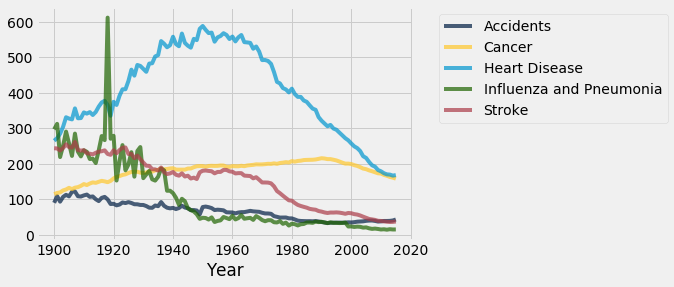

In [5]:
causes_for_plotting = causes_of_death.pivot('Cause', 'Year', values = 'Age Adjusted Death Rate', collect = sum)

# Do not change this line
causes_for_plotting.plot('Year')

Let's closely examine the graph displayed above to gain valuable insights into heart disease trends over time. Notably, during the 1960s, we observe a consistent decline in the death rate attributed to heart disease. This decline can be attributed to groundbreaking advancements in medical research, where researchers started to unveil the effects of smoking, blood pressure, and diet on the cardiovascular system.

With this newfound knowledge, doctors could recommend lifestyle changes to at-risk patients, leading to a significant reduction in heart attacks and related cardiovascular issues. This highlights the importance of public awareness and preventive measures in combating heart disease effectively.

However, despite the substantial decrease in death rates, heart disease remains a formidable threat, surpassing other causes of death. It is evident that much remains to be understood about the direct and indirect factors contributing to heart disease.

The data and graph offer valuable insights into the progress made in tackling heart disease but also underscore the need for continued research and exploration into the complexities of this condition. Armed with these observations, we can further strive towards enhanced strategies for preventing and managing heart-related health concerns.

Continuing this analysis will allow us to explore more deeply the factors influencing heart disease trends and devise effective interventions for improved cardiovascular health.

## Part 2: The Framingham Heart Study

The [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) is an observational study of cardiovascular health. The initial study followed over 5,000 volunteers for several decades, and followup studies even looked at their descendants. In this section, we'll investigate some of its key findings about diet, cholesterol, and heart disease.

Run the cell below to examine data for almost 4,000 subjects from the first wave of the study, collected in 1956.

In [6]:
framingham = Table.read_table('framingham.csv')
framingham

AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,DIABETES,GLUCOSE,DEATH,ANYCHD
39,106,70,195,0,0,77,0,1
46,121,81,250,0,0,76,0,0
48,127.5,80,245,1,0,70,0,0
61,150,95,225,1,0,103,1,0
46,130,84,285,1,0,85,0,0
43,180,110,228,0,0,99,0,1
63,138,71,205,0,0,85,0,1
45,100,71,313,1,0,78,0,0
52,141.5,89,260,0,0,79,0,0
43,162,107,225,1,0,88,0,0


Each row contains data from one subject. The first seven columns describe the subject at the time of their initial medical exam at the start of the study. The last column, `ANYCHD`, tells us whether the subject developed some form of heart disease at any point after the start of the study.

You may have noticed that the table contains fewer rows than subjects in the original study: this is because we are excluding subjects who already had heart disease as well as subjects with missing data.

### Section 1: Diabetes and the population

Before we begin our investigation into cholesterol, we'll first look at some limitations of this dataset. In particular, we will investigate ways in which this is or isn't a representative sample of the population by examining the number of subjects with diabetes.

[According to the CDC](https://www.cdc.gov/diabetes/statistics/slides/long_term_trends.pdf), the prevalence of diagnosed diabetes (i.e., the percentage of the population who have it) in the U.S. around this time was 0.93%. We are going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The probability that a participant within the Framingham Study has diabetes is equivalent to the prevalence of diagnosed diabetes within the population. (i.e., any difference is due to chance).

**Alternative Hypothesis**: The probability that a participant within the Framingham Study has diabetes is different than the prevalence of diagnosed diabetes within the population.

We are going to use the absolute distance between the observed prevalence and the true population prevalence as our test statistic. The column `DIABETES` in the `framingham` table contains a 1 for subjects with diabetes and a `0` for those without.

**Question 1**: What is the observed value of the statistic in the data from the Framingham Study? You should convert prevalences to proportions before calculating the statistic!

In [7]:
observed_diabetes_distance = abs(sum(framingham[5])/framingham.num_rows - 0.0093)
observed_diabetes_distance = 
observed_diabetes_distance

0.018029515877147319

**Question 2**: The array `diabetes_proportions` contains the proportions of the population without and with diabetes. Complete the following code to simulate 5000 values of the statistic under the null hypothesis.

In [8]:
diabetes_proportions = make_array(.9907, .0093)

diabetes_simulated_stats = make_array()

for i in np.arange(5000):
    simulated_stat = abs(sample_proportions(3842, diabetes_proportions)[1]-0.0093)
    diabetes_simulated_stats = np.append(diabetes_simulated_stats, simulated_stat)
    
diabetes_simulated_stats

array([  1.37152525e-03,   9.71004685e-04,   1.49156689e-03, ...,
         7.01197293e-05,   1.49156689e-03,   7.01197293e-05])

**Question 3**: Run the following cell to generate a histogram of the simulated values of your statistic, along with the observed value.


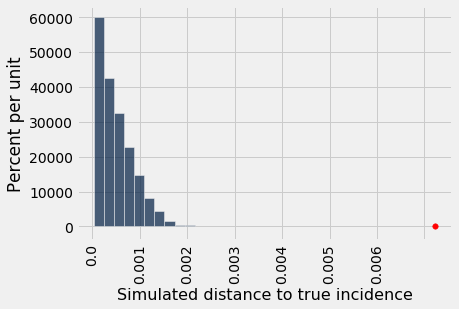

In [9]:
Table().with_column('Simulated distance to true incidence', diabetes_simulated_stats).hist()
plots.scatter(observed_diabetes_distance, 0, color='red', s=30)

**Question 4**: Based on the results of the test and the empirical distribution of the test statistic under the null, should you reject the null hypothesis?

*Yes, we would reject the null hypothesis. The point is too far from the others in the histogram so it is safe to reject.*

**Question 5**: You know that the study was well-designed to represent the population. Why might there be a difference between the population and the sample? Assign the name `framingham_diabetes_explanations` to a list of the following explanations that **are possible and consistent** with the observed data and hypothesis test results.

1. Healthy (non-diabetic) people are more likely to volunteer for the study.
2. Diabetes was under-diagnosed in the population (i.e., there were a lot of people in the population who had diabetes but weren't diagnosed).
3. The relatively wealthy population in Framingham ate a luxurious diet high in sugar (high-sugar diets are a known cause of diabetes).
4. The Framingham Study subjects were older on average than the general population, and therefore more likely to have diabetes.


In [10]:
framingham_diabetes_possibilities = [2, 3, 4]
framingham_diabetes_possibilities

[2, 3, 4]

In real-world studies, getting a truly representative random sample of the population is often incredibly difficult. Even just to accurately represent all Americans, a truly random sample would need to examine people across geographical, socioeconomic, community, and class lines (just to name a few). For a study like this, scientists would also need to make sure the medical exams were standardized and consistent across the different people being examined. In other words, there's a tradeoff between taking a more representative random sample and the cost of collecting all the data from the sample.

The Framingham study collected high-quality medical data from its subjects, even if the subjects may not be a perfect representation of the population of all Americans. This is a common issue that data scientists face: while the available data aren't perfect, they're the best we have. The Framingham study is generally considered the best in its class, so we'll continue working with it while keeping its limitations in mind.

(For more on representation in medical study samples, you can read these recent articles from [NPR](https://www.npr.org/sections/health-shots/2015/12/16/459666750/clinical-trials-still-dont-reflect-the-diversity-of-america) and [Scientific American](https://www.scientificamerican.com/article/clinical-trials-have-far-too-little-racial-and-ethnic-diversity/)).

### Section 2: Cholesterol and Heart Disease

In the remainder of this question, we are going to examine one of the main findings of the Framingham study: an association between serum cholesterol (i.e., how much cholesterol is in someone's blood) and whether or not that person develops heart disease.

We'll use the following null and alternative hypotheses:

**Null Hypothesis:** In the population, the distribution of cholesterol levels among those who get heart disease is the same as the distribution of cholesterol levels
among those who do not.

**Alternative Hypothesis:** The cholesterol levels of people in the population who get
heart disease are higher, on average, than the cholesterol level of people who do not.

**Question 1:** From the provided Null and Alternative Hypotheses, what seems more reasonable to use, A/B Testing or the Standard Hypothesis Testing? Assign the variable `reasonable_test` to one of the following choices. 

1. A/B Testing
2. Standard Hypothesis Test

In [11]:
reasonable_test = 1
reasonable_test

1

**Question 2:** Now that we have a null hypothesis, we need a test statistic. Explain and justify your choice of test statistic in two sentences or less.

*Hint*: Remember that larger values of the test statistic should favor the alternative over the null.

**Test Statistic:** *Our test statistics will be the difference between the two mean groups. This is a reasonable choice since the alternative is comparing the averages. $\mu_{Heart Disease}$ - $\mu_{No Heart Disease}$*

**Question 3**: Write a function that computes your test statistic. It should take a table with two columns, `TOTCHOL` and `ANYCHD`, and compute the test statistic you described above. 

In [12]:
def compute_framingham_test_statistic(tbl):
    with_heat = tbl.where('ANYCHD', 1).column('TOTCHOL')
    without_heat = tbl.where('ANYCHD', 0).column('TOTCHOL')
    return np.mean(with_heat)-np.mean(without_heat)


**Question 4**: Use the function you defined above to compute the observed test statistic, and assign it to the name `framingham_observed_statistic`.

In [13]:
framingham_observed_statistic = compute_framingham_test_statistic(framingham)
framingham_observed_statistic

16.635919905689406

Now that we have defined hypotheses and a test statistic, we are ready to conduct a hypothesis test. We'll start by defining a function to simulate the test statistic under the null hypothesis, and then use that function 1000 times to understand the distribution under the null hypothesis.

**Question 5**: Write a function to simulate the test statistic under the null hypothesis. 

The `simulate_framingham_null` function should simulate the null hypothesis once (not 1000 times) and return the value of the test statistic for that simulated sample.

In [14]:
def simulate_framingham_null():
    shuffled_frame = framingham.sample().column('TOTCHOL')
    sim_table_frame = framingham.with_column('TOTCHOL', shuffled_frame)
    return compute_framingham_test_statistic(sim_table_frame)

In [15]:
# Run your function once to make sure that it works.
simulate_framingham_null()

-0.76336260213594187

**Question 6**: Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 1000 values of the test statistic under the null hypothesis and store the result in the array framingham_simulated_stats.

*Hint*: You should use the function you wrote above in Question 3.

*Note*: Warning: running your code might take a few minutes!  We encourage you to check your `simulate_framingham_null()` code to make sure it works correctly before running this cell. 

In [16]:
framingham_simulated_stats = make_array()
repetitions = 1000

for i in np.arange(repetitions):
    sim_stat = simulate_framingham_null()
    framingham_simulated_stats = np.append(framingham_simulated_stats, sim_stat)

The following line will plot the histogram of the simulated test statistics, as well as a point for the observed test statistic. Make sure to run it, as it will be graded. 

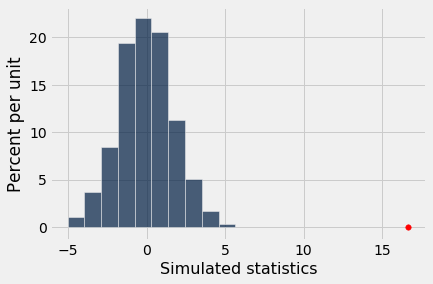

In [17]:
Table().with_column('Simulated statistics', framingham_simulated_stats).hist()
plots.scatter(framingham_observed_statistic, 0, color='red', s=30)

**Question 7**: Compute the p-value for this hypothesis test, and assign it to the name `framingham_p_value`.

*Hint*: One of the key findings of the Framingham study was a strong association between cholesterol levels and heart disease. If your p-value doesn't match up with this finding, you may want to take another look at your test statistic and/or your simulation.

In [18]:
framingham_p_value = np.count_nonzero(framingham_simulated_stats >= framingham_observed_statistic)/repetitions
framingham_p_value

0.0

**Question 8**: Despite the Framingham Heart Study's reputation as a well-conducted and rigorous study, it has some major limitations. Give one specific reason why it can't be used to say that high cholesterol *causes* heart disease.


*Association is not causation. Other investigations still need to be done in order to draw a conclusion about high cholesterol causing heart disease.*

Similar studies from the 1950s found positive associations between diets high in saturated fat, high cholesterol, and incidence of heart disease. In 1962, the U.S. Surgeon General said:

*"Although there is evidence that diet and dietary habits may be implicated in the development of coronary heart disease and may be significant in its prevention or control, at present our only research evidence is associative and not conclusive."*

## Part 3: Causality, the National Diet-Heart Study, and the Minnesota Coronary Experiment

To establish a causal link between saturated fat intake, serum cholesterol, and heart disease, a group of doctors in the US established the National Heart-Diet Study. The study was based in 6 centers: Baltimore, Boston, Chicago, Minneapolis-St. Paul, Oakland, and Faribault, MN. The first 5 centers recruited volunteers from the local population: volunteers and their families were asked to adjust their diet to include more or less saturated fat.

You may already have a strong intuition about what the doctors concluded in their findings, but the evidence from the trial was surprisingly complex.

**Question 1**: Why might the data from the National Heart-Diet Study not be enough to determine causality? Describe one specific limitation of the data from these first 5 centers in the study.

*Hint*: what is the main problem with fad diets?

*The main reason is because the fat diets are not consistent. If the body suddenly deprives from essential nutrients, it might lower the cholesterol level. But as soon as the body receives the normal diet, it goes to whatever it was before. That is why in this study, the five centers did not include the volunteer's historical diet to determine the risk of a heart disease.*

The sixth center was organized by Dr. Ivan Frantz, and its study was known as the Minnesota Coronary Experiment. Dr. Frantz was a strong proponent of reducing saturated fats to prevent death from heart disease. He believed so strongly in the idea that he placed his household on a strict diet very low in saturated fats. The main difference between the Minnesota Coronary Experiment and the rest of the National Diet-Heart Study was the setting. While the other centers in the study looked at volunteers, Dr. Frantz conducted his study at Faribault State Hospital, which housed patients who were institutionalized due to disabilities or mental illness.

In this institution, the subjects were randomly divided into two equal groups: half of the subjects, the **control group**, were fed meals cooked with saturated fats, and the other half, the **diet group**, were fed meals cooked with polyunsaturated fats. For example, the diet group's oils were replaced with corn oils and their butter was replaced with margarine. The subjects did not know which food they were getting, to avoid any potential bias or placebo effect. This type of study is known as a **blind** study.

Although standards for informed consent in participation weren't as strict then as they are today, the study was described as follows:

*"No consent forms were required because the study diets were considered to be acceptable as house diets and the testing was considered to contribute to better patient care.  Prior to beginning the diet phase, the project was explained and sample foods were served. Residents were given the opportunity to decline participation."*

Despite the level of detail and effort in the study, the results of the study were never extensively examined until the late 21st century. Over 40 years after the data were collected, Dr. Christopher Ramsden heard about the experiment, and asked Dr. Frantz's son Robert to uncover the files in the Frantz family home's dusty basement. You can learn more about the story of how the data was recovered on the [Revisionist History podcast](http://revisionisthistory.com/episodes/20-the-basement-tapes) or in [Scientific American magazine](https://www.scientificamerican.com/article/records-found-in-dusty-basement-undermine-decades-of-dietary-advice/).

**Question 2:** While the data from such a study may be useful scientifically, it also raises major ethical concerns. Describe at least one ethical problem with the study conducted at Faribault State Hospital.

*There isn't necessarily a single right or wrong answer to this question. If you're not sure, some areas of consideration may be the study organizers' selection of participants for the study, as well as their justification for not using consent forms. You could also ask yourself how the project might have been explained to the patients prior to the diet phase, and to what degree were they capable of consent.*

In recent years, poor treatment of patients at Faribault State Hospital (and other similar institutions in Minnesota) has come to light: the state has recently [changed patients' gravestones from numbers to their actual names](https://www.tcdailyplanet.net/minnesota-saying-sorry-treatment-persons-disabilities/), and [apologized for inhumane treatment of patients](https://www.tcdailyplanet.net/minnesota-saying-sorry-treatment-persons-disabilities/).

Unfortunately, the data for each individual in the 1968 study is not available; only summary statistics are available.  Therefore, in this project we create artificial synthetic data, based on those summary statistics.

In order to test whether eating diet actually reduced serum cholesterol levels, we need to create a table with one row for each participant in the study, as well as how their serum cholesterol changed. There were 1179 subjects in the diet group and 1176 subjects in the control group who had their serum cholesterol changes measured. 

The study measured the serum cholesterol at the start and end of the study, then used this to compute the percentage change for each individual.  Then, they computed the average and standard deviation of these percentage changes for each study group. We have these summary statistics: for those who received the unsaturated fat diet, the serum cholestorol decreased by 13.8% on average, with a standard deviation of 13%.  For those in the control group, the percentage change decreased by 1% on average, with a standard deviation of 14.5%.  We used these statistics to generate random synthetic percentage change levels for each individual, making an assumption about the distribution for these changes.  We have saved this data in `serum_cholesterol.csv`.  We read this table into `serum_cholesterol` below.

In [19]:
serum_cholesterol = Table.read_table('serum_cholesterol.csv')
serum_cholesterol

Condition,Change in Serum Cholesterol
Diet,-8.36662
Diet,-23.6885
Diet,-28.985
Diet,-10.9341
Diet,-17.9041
Diet,-11.7145
Diet,-13.6215
Diet,-2.2387
Diet,-2.03579
Diet,-13.5746


After determining if serum cholesterol is actually lowered by this new diet, we will see whether or not death rates were reduced as well. The following table is a summarized version of the data collected in the experiment. 

In [20]:
mortality_summary = Table.read_table('mortality_summary.csv')
mortality_summary

Age,Condition,Total,Deaths,CHD Deaths
0-34,Diet,1367,3,0
35-44,Diet,728,3,0
45-54,Diet,767,14,4
55-64,Diet,870,35,7
65+,Diet,953,190,42
0-34,Control,1337,7,1
35-44,Control,731,4,1
45-54,Control,816,16,4
55-64,Control,896,33,12
65+,Control,958,162,34


**Question 3:** The numbers of deaths in the Deaths column above are not specific to cardiovascular disease. For our tests, we are going to use the total number of deaths instead of the number of CHD deaths. If a hypothesis test shows that the rate of deaths in the diet group is different from the rate of deaths in the control group, which of the following are valid conclusions from the test? Assign the name `mortality_valid_conclusions` to a list of numbers.

1. Eating a diet rich in unsaturated fats causes an increased/decreased risk of death.
2. Eating a diet rich in unsaturated fats causes/prevents cardiovascular disease.
3. Lower cholesterol causes an increased/decreased risk of cardiovascular disease.
4. It is impossible to determine any causal relationship between any of these factors, even if the test shows an association.

In [21]:
mortality_valid_conclusions = [4]
mortality_valid_conclusions

[4]

To help with our simulations, we are going to expand the `mortality_summary` table so that we have one row for every subject in the experiment. Our goal is to put this into a table called `minnesota_data`.

**Question 4:** Using all of the notes below, complete the code below to create a table with four columns: "Age", "Condition", "Participated" and "Died". Each row should contain a specific patient and should have their age group and condition as specified in the `mortality_summary` table, a `True` in the "Participated" column since everyone participated in the experiment, and either a `True` or `False` in the "Died" column, depending on if they are alive or dead. 

The total number of rows of `minnesota_data` should be the same as the number of participants summarized in the mortality_summary table. 

*Hint*: The most useful notes from below will be the final three; how to get an item out of a row, passing in just one value into the second argument of `with_column`, and how to iterate over rows. Make sure you use the other two notes to understand what the rest of this code is doing.  

The following few notes will all be helpful to finish and understand the code below: 

* `tbl1.append(tbl2)` adds all of the rows of `tbl2` into `tbl1`, assuming they have the same column names 
* `np.arange(5) < 3` returns the following array: `[True, True, True, False, False]`
* `row.item(x)` returns the item in column `x` in a specific row of a table
*  If `my_table` has 10 rows. Then, `my_table.with_column('Num', val)` adds an array of length 10, with each element being val, as a new column of the table. 
*  To iterate over all rows of a table, you can write `for row in tbl.rows:`

In [22]:
minnesota_data = Table(['Age', 'Condition', 'Died', 'Participated'])

for row in mortality_summary.rows:
    i = np.arange(0, row.item('Total'))
    t = Table().with_column('Died', i < row.item('Deaths'))
    t = t.with_column('Age', row.Age)
    t = t.with_column('Condition', row.Condition)
    t = t.with_column('Participated', 'True')
    minnesota_data.append(t)

minnesota_data

Age,Condition,Died,Participated
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True


## Part 4: Running a Hypothesis Test

Now that we have two clean datasets from the Minnesota Coronary Experiment to work with, we can focus on determining causal links. Assuming that these randomized controlled experiments are samples from the larger population, we can work on using the inference techniques discussed so far in the course to answer the following questions: 

* Does changing saturated fats to polyunsaturated fats in a person's diet **decrease their serum cholestrol levels**? 


* Does changing saturated fats to polyunsaturated fats in a person's diet **affect their risk of death**? 

### Section 1: Reducing Serum Cholesterol 

First, we want to test whether the unsaturated fat diet changes serum cholesterol levels. To do so, we will need the `serum_cholesterol` table. Remember that there are two unique values in the 'Condition' column: 'Diet' and 'Control'.

In [23]:
serum_cholesterol

Condition,Change in Serum Cholesterol
Diet,-8.36662
Diet,-23.6885
Diet,-28.985
Diet,-10.9341
Diet,-17.9041
Diet,-11.7145
Diet,-13.6215
Diet,-2.2387
Diet,-2.03579
Diet,-13.5746


**Question 1:** State precisely a null hypothesis and an alternative hypothesis which can help us determine if the unsaturated fat diet *decreases* serum cholesterol levels as compared to the control diet. 

**Null Hypothesis:** The unsaturated fat diet does not decrease cholesterol levels (diet cholesterol levels $\ge$ control cholesterol levels).

**Alternative Hypothesis:** The unsaturated fat diet decreases serum cholesterol levels (diet cholesterol levels < control cholesterol levels)

In order to differentiate between our two hypotheses above, we consider the difference: average of the percentage increase in cholesterol level in the control group minus the average of the percentage increase in cholesterol level in the diet group.

**Question 2:** Do larger values of the test statistic point towards the  null hypothesis or the alternative hypothesis? Assign `larger_chol_stat` to either 1 if it's the null, or 2 if it's the alternative. 

In [24]:
larger_chol_stat = 2

**Question 3:** Define a function `compute_chol_test_statistic` which takes in a table just like `serum_cholesterol` and returns the test statistic of the given data. Remember that the "Change in Serum Cholesterol" column in the provided `tbl` for `compute_chol_test_statistic` will already have % changes.

In [25]:
def compute_chol_test_statistic(tbl):
    grouped_chol = tbl.group('Condition', np.mean)
    percent_change_diet_chol = grouped_chol.column(1)[1]
    percent_change_control_chol = grouped_chol.column(1)[0]
    return abs(percent_change_diet_chol - percent_change_control_chol)

**Question 4:** Assign `chol_observed_statistic` to the value of the test statistic on the observed data. 

In [26]:
chol_observed_statistic = 12.829344627886611
chol_observed_statistic

12.829344627886611

**Question 5:** The next step in our hypothesis test is to simulate what we might observe if the null hypothesis were true. Describe the steps needed to simulate the test statistic under the null hypothesis. Then, write a function to simulate one value of the statistic under the null hypothesis.

*There are 1179 subjects in the diet group and 1176 in the control group who had their serum cholesterol changes measured. Under the null distribution, it would not matter which 1179 subjects would be placed in the "diet" group and which 1176 subjects would be placed in the "control" group.*

*In order to simulate a value of the test statistic under the null hypothesis, we would need to shuffle all of our condition labels so that we get a completely different dataset. Then, we would take our new table and use our previously defined function (`compute_chol_test_statistic`) to compare the new mean diet and control cholesterol values and compute our new test statistic.*

In [27]:
def simulate_chol_change_null():
    shuffled_chol = serum_cholesterol.sample(with_replacement = False).column(0)
    sim_table_chol = serum_cholesterol.append_column('Condition', shuffled_chol)
    return compute_chol_test_statistic(sim_table_chol)

In [28]:
# Run this cell to check that your function works.
simulate_chol_change_null()

0.828375735815162

**Question 6:** Simulate 1000 values of the test statistic by simulating taking a sample under the null hypothesis multiple times and assign this collection of test statistics to `chol_simulated_stats`. Put the test statistics into a one column table with 1000 rows called `chol_simulated_table`. 

*Note*: Your code might take a couple of minutes to run.

In [29]:
chol_simulated_stats = make_array()

for i in np.arange(1000):
    sim_stat = simulate_chol_change_null()
    chol_simulated_stats = np.append(chol_simulated_stats, sim_stat)


chol_simulated_table = Table().with_column('Simulated Test Statistics', chol_simulated_stats)

The following line plots the histogram of the simulated test statistics, as well as a point for the observed test statistic. Make sure to run it, as it will be graded. 

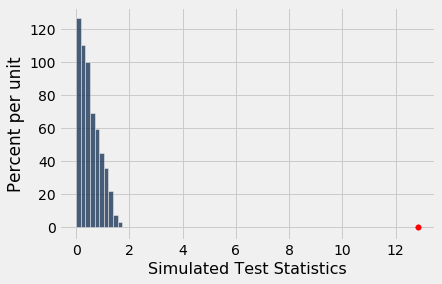

In [30]:
chol_simulated_table.hist()
plots.scatter(chol_observed_statistic, 0, color='red', s=30)

**Question 7:** Without calculating any p-values, can we conclude from the test that the change in diet **causes** a larger percentage difference in serum cholesterol levels over time? Explain your answer. 

*Yes, since the trials were randomized we are able to conclude that the treatment causes the difference. The randomness eliminates any confounding variable that could prohibit us from concluding causality between diet and cholesterol levels.*

**Question 8:** Assign `cholesterol_conclusion` to 1, 2, or 3, where the number chosen corresponds to the conclusion that we can make from this study.

1. The results of this analysis indicate that changing saturated fats to polyunsaturated fats in a person's diet decreases their serum cholesterol levels.  
2. The results of this analysis indicate that changing saturated fats to polyunsaturated fats in a person's diet does not decrease their serum cholesterol levels.  
3. The results of this analysis do not allow us to draw any conclusions about the effect of changing saturated fats to polyunsaturated fats in a person's diet on their serum cholesterol levels.

In [31]:
cholesterol_conclusion = 1
cholesterol_conclusion

1

### Section 2: Reducing Death Rates

In the previous section, we made a decision on whether dietary change affects the change in serum cholesterol levels. We have not yet, however, explored how the change in diet affects death rates among the subjects. To explore this, we move our attention to the `minnesota_data` table. 

In [32]:
minnesota_data

Age,Condition,Died,Participated
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True


**Question 1:** Set up a null hypothesis and an alternative hypothesis that we can use to answer whether or not the unsaturated fat diet causes different rates of death in the two groups.

**Null Hypothesis:** *The unsaturated fat diet does not cause a decreased rate of death and the death rate is equivalent amongst both groups.*

**Alternative Hypothesis:** *The unsaturated fat diet causes a decreased rate of death and the death rate is not equivalent amongst both groups.*

**Question 2:** Create a table named `summed_mn_data`, with three columns and two rows. The three columns should be "Condition", "Died sum", and "Participated sum". There should be one row for the diet group and one row for the control group, and each row should encode the total number of people who participated in that group and the total number of people who died in that group. 

In [33]:
summed_mn_data = minnesota_data.group('Condition', sum).with_column('Participated sum', minnesota_data.group('Condition').column(1)).drop('Age sum')
summed_mn_data

Condition,Died sum,Participated sum
Control,222,4738
Diet,245,4685


**Question 3:** In thinking of a test statistic, one researcher decides that the absolute difference in the number of people who died in the control group and the number of people who died in the diet group is a sufficient test statistic. Give one **specific** reason why this test statistic will not work. 

*This test statistic will not work because there are more participants in the control group than in the diet group.*

To combat the problem above, we instead decide to use the the absolute difference in hazard rates between the two groups as our test statistic. The *hazard rate* is defined as the proportion of people who died in a specific group out of the total number who participated in the study from that group. 

**Question 4:** Define a new table `summed_mn_hazard_data` that contains the columns of `summed_mn_data` along with an additional column, `Hazard Rate`, that contains the hazard rates for each condition.

In [34]:
summed_mn_hazard_data = summed_mn_data.with_column('Hazard Rate', summed_mn_data.column('Died sum')/summed_mn_data.column('Participated sum'))
summed_mn_hazard_data

Condition,Died sum,Participated sum,Hazard Rate
Control,222,4738,0.0468552
Diet,245,4685,0.0522946


**Question 5:** Define a function `compute_hazard_difference` which takes in a table like `summed_mn_hazard_data` and returns the absolute difference between the hazard rates of the control group and the diet group. Use it to get the observed test statistic and assign it to `death_rate_observed_statistic`.

In [35]:
def compute_hazard_difference(tbl):
    return abs(tbl.column('Hazard Rate').item(0) - tbl.column('Hazard Rate').item(1))

death_rate_observed_statistic = compute_hazard_difference(summed_mn_hazard_data)
death_rate_observed_statistic

0.005439343927004493

**Question 6:** We are now in a position to run a hypothesis test to help differentiate between our two hypothesis using our data. Define a function `test` which takes in a table like `minnesota_data`. It simulates samples and calculates the rate differences for these samples under the null hypothesis 500 times, and uses them to return a P-Value with respect to our observed data. Note that your function should use the values in `t`, and should not refer to `minnesota_table`!

*Hint:* This is a very long, involved problem. Start by outlining the steps you'll need to execute in this function and address each separately. Small steps and comments will be very helpful. You've already written a lot of key steps!

Note: Your code might take a long time to run.

In [36]:
def test(t):
    diffs = make_array()
    repetitions = 500
    for i in range(repetitions):
        shuffled_condition = t.sample(with_replacement = False).column('Condition')
        sim_table_condition = t.with_column('Shuffled Condition', shuffled_condition)
        summed_table_data = sim_table_condition.group('Shuffled Condition', sum).with_column('Participated sum', t.group('Condition').column(1)).drop('Age sum', 'Condition sum')
        summed_table_hazard_data = summed_table_data.with_column('Hazard Rate', summed_table_data.column('Died sum')/summed_table_data.column('Participated sum'))
        haz_diff = compute_hazard_difference(summed_table_hazard_data)
        diffs = np.append(diffs, haz_diff)
    return np.count_nonzero(diffs <= death_rate_observed_statistic)/repetitions

our_p_value = test(minnesota_data)
our_p_value

0.788

**Question 7:** Using the P-Value above, what can we conclude about whether the change in diet causes a difference in death rate? Assume a normal p-value cutoff of .05. 

*Our P-value is greater than the normal p-value cutoff of 0.05, so we accept the null hypothesis and we conclude that the unsaturated diet does not cause a decreased rate of death.*

## Part 5: Conclusion

*This project helped us understand more about hypothesis testing and how we can use such testing along side our codes to help us make accurate conclusions about an experiment. Replacing saturated fats with unsaturated fats causes a change in serum cholesterol, but it does not cause a change in death rate. Other factors that would be important to consider with respect to the patient are physical activity, age, weight, and gender.*

### Further reading

If you're interested in learning more, you can check out these articles:

* [Origin story of the Framingham Heart Study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1449227/)
* [Recent paper about Minnesota findings](https://www.bmj.com/content/353/bmj.i1246)
* [National Diet-Heart Study initial report](https://jamanetwork.com/journals/jama/article-abstract/666261)
* [National Diet-Heart Study final report](http://www.epi.umn.edu/cvdepi/study-synopsis/national-diet-heart-study/)